# <center>ECSE 415 - Assignment 2</center>
  ### <center>Patrick Erath - 260719203 </center>

## Question2 - Matching using SIFT - Book Reveal 

1. Find SIFT keypoints for both input images 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [34]:
# Read in the two images
book_crop = cv2.imread('./book_crop.jpg')
book_occ = cv2.imread('./book_occlusion.jpg')

# Convert to RGB
book_crop = cv2.cvtColor(book_crop, cv2.COLOR_BGR2RGB)
book_occ = cv2.cvtColor(book_occ, cv2.COLOR_BGR2RGB)

# Find SIFT keypoints for both input images
sift = cv2.xfeatures2d.SIFT_create()
keypoints_crop, descriptors_crop = sift.detectAndCompute(book_crop, None)
keypoints_occ, descriptors_occ = sift.detectAndCompute(book_occ, None)


2. Match keypoints of reference image (book_crop.jpg) to thekeypoints of the occluded image using brute-force method

In [35]:
# Match keypoints of reference image (book_crop.jpg) to the 
# keypoints of the occluded image using brute-force method
bf = cv2.BFMatcher()
matches = bf.match(descriptors_crop, descriptors_occ)

3. Sort matching keypoints according to matching distance

In [36]:
# Sort matching keypoints according to matching distance
matches = sorted(matches, key = lambda x:x.distance)

4. Display top ten matching keypoints

(Text(0.5, 1.0, 'Top 10 Matching keypoints'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

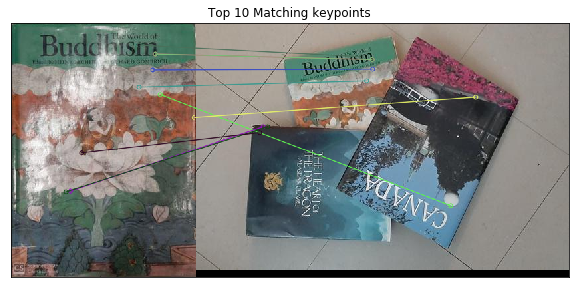

In [37]:
# Display top ten matching keypoints
imgmatch = cv2.drawMatches(book_crop, keypoints_crop,
                           book_occ, keypoints_occ,
                           matches[:10], None, flags=2
                           )
plt.figure(figsize=(10,10))
plt.imshow(imgmatch)
plt.title("Top 10 Matching keypoints"), plt.xticks([]), plt.yticks([])

5.  Compute a homography to align the images using RANSAC method and apply the transformation matrix

In [38]:
# Arrange matching keypoints into two seperate lists
# Max_distance of 300 and MASK= 21 was found by running a for 
# loop with different combinations and plotting them all
GoodMatches = []
for i, m in enumerate(matches):
    if m.distance < 200:
        GoodMatches.append((m.trainIdx, m.queryIdx))

# Get the keypoints that are good matches
m_crop = np.float32([ keypoints_crop[i].pt for(__, i) in GoodMatches])
m_occ = np.float32([ keypoints_occ[i].pt for (i, __) in GoodMatches])

height_occ, width_occ = book_occ.shape[0:2]
height_crop, width_crop = book_crop.shape[0:2]

H,_ = cv2.findHomography(m_crop, m_occ, cv2.RANSAC, 21)
wimg = cv2.warpPerspective(book_crop, H, (width_crop+width_occ, height_occ))

col, row = wimg.shape[0:2]

6. Paste transformed reference image on the occluded view to generate un-occluded view

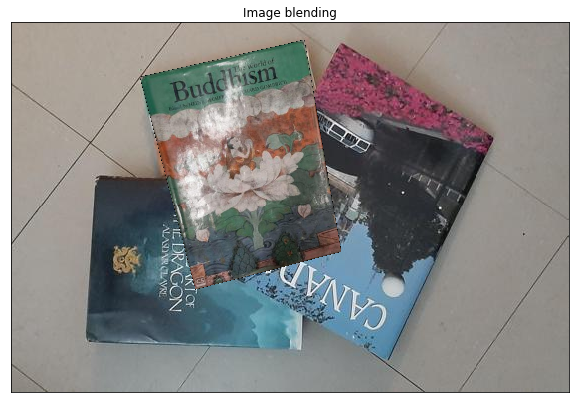

In [39]:
# Paste transformed reference image on the occluded 
# view to generate un-occluded view
img_disp = book_occ.copy()
img_disp2 = book_occ.copy()

for row in range(wimg.shape[0]):
    for col in range(wimg.shape[1]):
        if(wimg[row][col].any()!=0):
            img_disp[row][col]=wimg[row][col]

plt.figure(figsize=(10,10))
plt.title('Image blending')
plt.imshow(img_disp), plt.xticks([]), plt.yticks([])
plt.show()